In [1]:
import findspark 
findspark.init("/home/ubuntu/spark-2.1.1-bin-hadoop2.7")
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("hyin190_BDAS").getOrCreate()


In [2]:
df = spark.read.csv('./PRSA_Data_Aotizhongxin_20130301-20170228.csv',header='True',inferSchema =True)

In [3]:
df.show()

+---+----+-----+---+----+----+----+---+---+---+---+----+------+-----+----+---+----+------------+
| No|year|month|day|hour|PM25|PM10|SO2|NO2| CO| O3|TEMP|  PRES| DEWP|RAIN| wd|WSPM|     station|
+---+----+-----+---+----+----+----+---+---+---+---+----+------+-----+----+---+----+------------+
|  1|2013|    3|  1|   0|   4|   4|  4|  7|300| 77|-0.7|  1023|-18.8|   0|NNW| 4.4|Aotizhongxin|
|  2|2013|    3|  1|   1|   8|   8|  4|  7|300| 77|-1.1|1023.2|-18.2|   0|  N| 4.7|Aotizhongxin|
|  3|2013|    3|  1|   2|   7|   7|  5| 10|300| 73|-1.1|1023.5|-18.2|   0|NNW| 5.6|Aotizhongxin|
|  4|2013|    3|  1|   3|   6|   6| 11| 11|300| 72|-1.4|1024.5|-19.4|   0| NW| 3.1|Aotizhongxin|
|  5|2013|    3|  1|   4|   3|   3| 12| 12|300| 72|  -2|1025.2|-19.5|   0|  N|   2|Aotizhongxin|
|  6|2013|    3|  1|   5|   5|   5| 18| 18|400| 66|-2.2|1025.6|-19.6|   0|  N| 3.7|Aotizhongxin|
|  7|2013|    3|  1|   6|   3|   3| 18| 32|500| 50|-2.6|1026.5|-19.1|   0|NNE| 2.5|Aotizhongxin|
|  8|2013|    3|  1|   7|   3|

In [4]:
df.columns

['No',
 'year',
 'month',
 'day',
 'hour',
 'PM25',
 'PM10',
 'SO2',
 'NO2',
 'CO',
 'O3',
 'TEMP',
 'PRES',
 'DEWP',
 'RAIN',
 'wd',
 'WSPM',
 'station']

In [5]:
df.count()

35064

In [6]:
df.printSchema()

root
 |-- No: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- day: integer (nullable = true)
 |-- hour: integer (nullable = true)
 |-- PM25: string (nullable = true)
 |-- PM10: string (nullable = true)
 |-- SO2: string (nullable = true)
 |-- NO2: string (nullable = true)
 |-- CO: string (nullable = true)
 |-- O3: string (nullable = true)
 |-- TEMP: string (nullable = true)
 |-- PRES: string (nullable = true)
 |-- DEWP: string (nullable = true)
 |-- RAIN: string (nullable = true)
 |-- wd: string (nullable = true)
 |-- WSPM: string (nullable = true)
 |-- station: string (nullable = true)



In [7]:
import pandas as pd
aotizhongxin= pd.read_csv('./PRSA_Data_Aotizhongxin_20130301-20170228.csv')

In [8]:
print(aotizhongxin.dtypes)

No           int64
year         int64
month        int64
day          int64
hour         int64
PM25       float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object


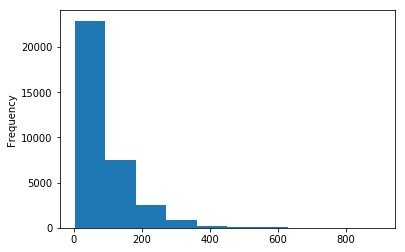

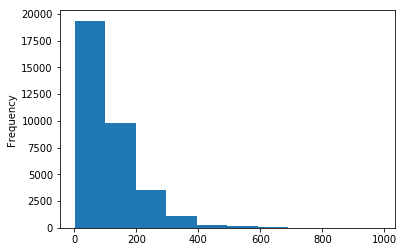

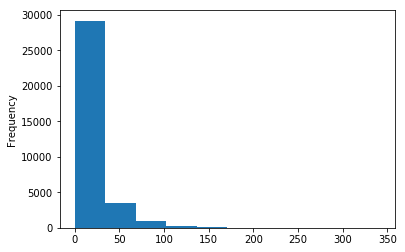

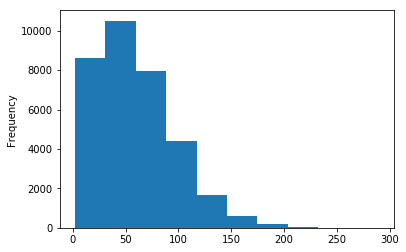

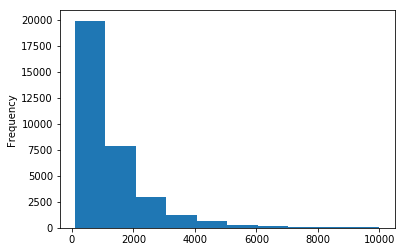

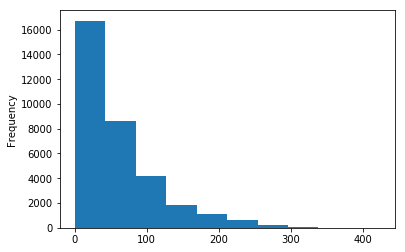

In [10]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
aotizhongxin["PM25"].plot.hist()
plt.show()
aotizhongxin["PM10"].plot.hist()
plt.show()
aotizhongxin["SO2"].plot.hist()
plt.show()
aotizhongxin["NO2"].plot.hist()
plt.show()
aotizhongxin["CO"].plot.hist()
plt.show()
aotizhongxin["O3"].plot.hist()
plt.show()



In [11]:
corr = aotizhongxin.corr()
corr.style.background_gradient(cmap='coolwarm')

,No,year,month,day,hour,PM25,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
No,1,0.969533,0.0431805,0.0177644,0.000683868,-0.0246712,-0.0804155,-0.248128,-0.087804,0.0616007,0.0522047,-0.10779,0.236941,-0.13324,0.00222031,0.0958062
year,0.969533,1,-0.20201,-0.00556908,0,-0.0306116,-0.0730062,-0.183672,-0.115185,0.0478212,0.0749667,-0.137229,0.232626,-0.197323,-0.00103184,0.133693
month,0.0431805,-0.20201,1,0.0105223,0,0.0255055,-0.027277,-0.249277,0.118648,0.0529204,-0.0964783,0.130377,-0.00565811,0.273236,0.0134975,-0.161326
day,0.0177644,-0.00556908,0.0105223,1,-5.20277e-18,0.00792024,0.0321905,-0.0188446,0.0157144,-0.0205783,0.00365719,0.0143234,0.0225369,0.0234254,-0.00249074,-0.0167065
hour,0.000683868,0,0,-5.20277e-18,1,-0.010388,0.0224215,0.00288555,-0.0434529,-0.047077,0.298161,0.141158,-0.0376111,-0.0134289,0.0115311,0.155515
PM25,-0.0246712,-0.0306116,0.0255055,0.00792024,-0.010388,1,0.879104,0.481025,0.684986,0.785006,-0.161448,-0.129415,-0.0057271,0.120112,-0.0140039,-0.27874
PM10,-0.0804155,-0.0730062,-0.027277,0.0321905,0.0224215,0.879104,1,0.469045,0.652325,0.680404,-0.139914,-0.111147,-0.0355939,0.0616668,-0.0277947,-0.183132
SO2,-0.248128,-0.183672,-0.249277,-0.0188446,0.00288555,0.481025,0.469045,1,0.432081,0.540275,-0.200193,-0.350608,0.203921,-0.282565,-0.0416088,-0.113115
NO2,-0.087804,-0.115185,0.118648,0.0157144,-0.0434529,0.684986,0.652325,0.432081,1,0.690202,-0.50038,-0.241059,0.0816359,0.0673444,-0.0400768,-0.49157
CO,0.0616007,0.0478212,0.0529204,-0.0205783,-0.047077,0.785006,0.680404,0.540275,0.690202,1,-0.326462,-0.366898,0.215556,-0.0981202,-0.0184286,-0.284888


In [12]:
dm2=df.na.drop(how="any",subset="PM10")

In [13]:
print(aotizhongxin.isnull().any())

No         False
year       False
month      False
day        False
hour       False
PM25        True
PM10        True
SO2         True
NO2         True
CO          True
O3          True
TEMP        True
PRES        True
DEWP        True
RAIN        True
wd          True
WSPM        True
station    False
dtype: bool


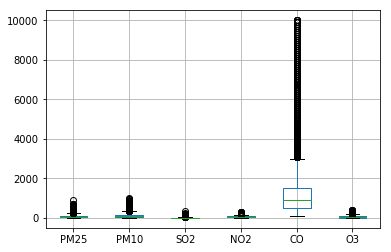

In [14]:
aotizhongxin[["PM25","PM10","SO2","NO2","CO","O3"]].boxplot()
plt.show()

In [15]:
df.select(df["year"],df["month"],df["day"],df["hour"],df["PM25"],df["PM10"],df["SO2"],df["NO2"],df["CO"],df["O3"],df["station"]).show()

+----+-----+---+----+----+----+---+---+---+---+------------+
|year|month|day|hour|PM25|PM10|SO2|NO2| CO| O3|     station|
+----+-----+---+----+----+----+---+---+---+---+------------+
|2013|    3|  1|   0|   4|   4|  4|  7|300| 77|Aotizhongxin|
|2013|    3|  1|   1|   8|   8|  4|  7|300| 77|Aotizhongxin|
|2013|    3|  1|   2|   7|   7|  5| 10|300| 73|Aotizhongxin|
|2013|    3|  1|   3|   6|   6| 11| 11|300| 72|Aotizhongxin|
|2013|    3|  1|   4|   3|   3| 12| 12|300| 72|Aotizhongxin|
|2013|    3|  1|   5|   5|   5| 18| 18|400| 66|Aotizhongxin|
|2013|    3|  1|   6|   3|   3| 18| 32|500| 50|Aotizhongxin|
|2013|    3|  1|   7|   3|   6| 19| 41|500| 43|Aotizhongxin|
|2013|    3|  1|   8|   3|   6| 16| 43|500| 45|Aotizhongxin|
|2013|    3|  1|   9|   3|   8| 12| 28|400| 59|Aotizhongxin|
|2013|    3|  1|  10|   3|   6|  9| 12|400| 72|Aotizhongxin|
|2013|    3|  1|  11|   3|   6|  9| 14|400| 71|Aotizhongxin|
|2013|    3|  1|  12|   3|   6|  7| 13|300| 74|Aotizhongxin|
|2013|    3|  1|  13|   

In [16]:
print(pd.isnull(aotizhongxin).sum())

No            0
year          0
month         0
day           0
hour          0
PM25        925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64


In [17]:
pd_df = aotizhongxin[["year","month","day","hour","PM25","PM10","SO2","NO2","CO","O3","station"]]
pd_df = pd_df.dropna(axis=0,how='any')
print(pd.isna(pd_df).sum())
print(pd_df.shape)

year       0
month      0
day        0
hour       0
PM25       0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
station    0
dtype: int64
(31896, 11)


In [18]:
from pyspark.sql import functions as sf
df = df.withColumn('date', 

                    sf.concat(sf.col('year'),sf.lit('-'), sf.col('month'),sf.lit('-'), sf.col('day'),sf.lit(' '), sf.col('hour'),sf.lit(':00:00')))

df.show()

+---+----+-----+---+----+----+----+---+---+---+---+----+------+-----+----+---+----+------------+-----------------+
| No|year|month|day|hour|PM25|PM10|SO2|NO2| CO| O3|TEMP|  PRES| DEWP|RAIN| wd|WSPM|     station|             date|
+---+----+-----+---+----+----+----+---+---+---+---+----+------+-----+----+---+----+------------+-----------------+
|  1|2013|    3|  1|   0|   4|   4|  4|  7|300| 77|-0.7|  1023|-18.8|   0|NNW| 4.4|Aotizhongxin| 2013-3-1 0:00:00|
|  2|2013|    3|  1|   1|   8|   8|  4|  7|300| 77|-1.1|1023.2|-18.2|   0|  N| 4.7|Aotizhongxin| 2013-3-1 1:00:00|
|  3|2013|    3|  1|   2|   7|   7|  5| 10|300| 73|-1.1|1023.5|-18.2|   0|NNW| 5.6|Aotizhongxin| 2013-3-1 2:00:00|
|  4|2013|    3|  1|   3|   6|   6| 11| 11|300| 72|-1.4|1024.5|-19.4|   0| NW| 3.1|Aotizhongxin| 2013-3-1 3:00:00|
|  5|2013|    3|  1|   4|   3|   3| 12| 12|300| 72|  -2|1025.2|-19.5|   0|  N|   2|Aotizhongxin| 2013-3-1 4:00:00|
|  6|2013|    3|  1|   5|   5|   5| 18| 18|400| 66|-2.2|1025.6|-19.6|   0|  N| 3

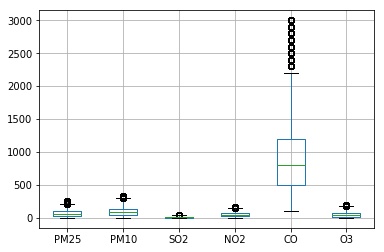

In [19]:
for x in pd_df[["PM25","PM10","SO2","NO2","CO","O3"]]:
    q75, q25 = np.percentile(pd_df.loc[:, x], [75, 25])
    intr_qr = q75 - q25
    max = q75 + (1.5 * intr_qr)
    min = q25 - (1.5 * intr_qr)

    pd_df.loc[pd_df[x] < min, x] = intr_qr
    pd_df.loc[pd_df[x] > max, x] = intr_qr
pd_df[["PM25","PM10","SO2","NO2","CO","O3"]].boxplot()
plt.show()

In [20]:
pd_df['Time']= pd_df['year'].map(str)+'-'+pd_df['month'].map(str)+'-'+ pd_df['day'].map(str)+' '+ pd_df['hour'].map(str)+':00:00'
pd_df = pd_df[["PM25","PM10","SO2","NO2","CO","O3","station","Time"]]


In [21]:
for x in pd_df[["NO2"]]:
    pd_df.loc[pd_df[x] <= 40, "NO2_group"] = "Good"
    pd_df.loc[pd_df[x] >= 41, "NO2_group"] = "Moderate"
    pd_df.loc[pd_df[x] >= 81, "NO2_group"] = "Unhealthy for Sensitive"
    pd_df.loc[pd_df[x] >= 181, "NO2_group"] = "Unhealthy"
    pd_df.loc[pd_df[x] >= 281, "NO2_group"] = "Very unhealthy"
    pd_df.loc[pd_df[x] >= 566, "NO2_group"] = "Hazardous"
for x in pd_df[["SO2"]]:
    pd_df.loc[pd_df[x] <= 50, "SO2_group"] = "Good"
    pd_df.loc[pd_df[x] >= 51, "SO2_group"] = "Moderate"
    pd_df.loc[pd_df[x] >= 150, "SO2_group"] = "Unhealthy for Sensitive"
    pd_df.loc[pd_df[x] >= 476, "SO2_group"] = "Unhealthy"
    pd_df.loc[pd_df[x] >= 801, "SO2_group"] = "Very unhealthy"
    pd_df.loc[pd_df[x] >= 1601, "SO2_group"] = "Hazardous"
for x in pd_df[["PM10"]]:
    pd_df.loc[pd_df[x] <= 50, "PM10_group"] = "Good"
    pd_df.loc[pd_df[x] >= 51, "PM10_group"] = "Moderate"
    pd_df.loc[pd_df[x] >= 151, "PM10_group"] = "Unhealthy for Sensitive"
    pd_df.loc[pd_df[x] >= 251, "PM10_group"] = "Unhealthy"
    pd_df.loc[pd_df[x] >= 351, "PM10_group"] = "Very unhealthy"
    pd_df.loc[pd_df[x] >= 421, "PM10_group"] = "Hazardous"
for x in pd_df[["CO"]]:
    pd_df.loc[pd_df[x] <= 2000, "CO_group"] = "Good"
    pd_df.loc[pd_df[x] >= 2001, "CO_group"] = "Moderate"
    pd_df.loc[pd_df[x] >= 4001, "CO_group"] = "Unhealthy for Sensitive"
    pd_df.loc[pd_df[x] >= 14001, "CO_group"] = "Unhealthy"
    pd_df.loc[pd_df[x] >= 24001, "CO_group"] = "Very unhealthy"
    pd_df.loc[pd_df[x] >= 36001, "CO_group"] = "Hazardous"
for x in pd_df[["O3"]]:
    pd_df.loc[pd_df[x] <= 100, "O3_group"] = "Good"
    pd_df.loc[pd_df[x] >= 101, "O3_group"] = "Moderate"
    pd_df.loc[pd_df[x] >= 161, "O3_group"] = "Unhealthy for Sensitive"
    pd_df.loc[pd_df[x] >= 216, "O3_group"] = "Unhealthy"
    pd_df.loc[pd_df[x] >= 266, "O3_group"] = "Very unhealthy"
    pd_df.loc[pd_df[x] >= 801, "O3_group"] = "Hazardous"
for x in pd_df[["PM25"]]:
    pd_df.loc[pd_df[x] <= 35, "PM25_group"] = "Good"
    pd_df.loc[pd_df[x] >= 36, "PM25_group"] = "Moderate"
    pd_df.loc[pd_df[x] >= 76, "PM25_group"] = "Unhealthy for Sensitive"
    pd_df.loc[pd_df[x] >= 126, "PM25_group"] = "Unhealthy"
    pd_df.loc[pd_df[x] >= 151, "PM25_group"] = "Very unhealthy"
    pd_df.loc[pd_df[x] >= 251, "PM25_group"] = "Hazardous"
print(pd_df["PM25_group"].unique())

['Good' 'Moderate' 'Unhealthy for Sensitive' 'Unhealthy' 'Very unhealthy'
 'Hazardous']


In [22]:
pd_df

,PM25,PM10,SO2,NO2,CO,O3,station,Time,NO2_group,SO2_group,PM10_group,CO_group,O3_group,PM25_group
0,4.0,4.0,4.0,7.0,300.0,77.0,Aotizhongxin,2013-3-1 0:00:00,Good,Good,Good,Good,Good,Good
1,8.0,8.0,4.0,7.0,300.0,77.0,Aotizhongxin,2013-3-1 1:00:00,Good,Good,Good,Good,Good,Good
2,7.0,7.0,5.0,10.0,300.0,73.0,Aotizhongxin,2013-3-1 2:00:00,Good,Good,Good,Good,Good,Good
3,6.0,6.0,11.0,11.0,300.0,72.0,Aotizhongxin,2013-3-1 3:00:00,Good,Good,Good,Good,Good,Good
4,3.0,3.0,12.0,12.0,300.0,72.0,Aotizhongxin,2013-3-1 4:00:00,Good,Good,Good,Good,Good,Good
5,5.0,5.0,18.0,18.0,400.0,66.0,Aotizhongxin,2013-3-1 5:00:00,Good,Good,Good,Good,Good,Good
6,3.0,3.0,18.0,32.0,500.0,50.0,Aotizhongxin,2013-3-1 6:00:00,Good,Good,Good,Good,Good,Good
7,3.0,6.0,19.0,41.0,500.0,43.0,Aotizhongxin,2013-3-1 7:00:00,Moderate,Good,Good,Good,Good,Good
8,3.0,6.0,16.0,43.0,500.0,45.0,Aotizhongxin,2013-3-1 8:00:00,Moderate,Good,Good,Good,Good,Good
9,3.0,8.0,12.0,28.0,400.0,59.0,Aotizhongxin,2013-3-1 9:00:00,Good,Good,Good,Good,Good,Good


In [23]:
import pandas as pd
aotizhongxin = pd.read_csv("PRSA_Data_Aotizhongxin_20130301-20170228.csv")
Changping = pd.read_csv("PRSA_Data_Changping_20130301-20170228.csv")
Dingling = pd.read_csv("PRSA_Data_Dingling_20130301-20170228.csv")
Dongsi = pd.read_csv("PRSA_Data_Dongsi_20130301-20170228.csv")
Guanyuan = pd.read_csv("PRSA_Data_Guanyuan_20130301-20170228.csv")
Gucheng = pd.read_csv("PRSA_Data_Gucheng_20130301-20170228.csv")
Huairou = pd.read_csv("PRSA_Data_Huairou_20130301-20170228.csv")
Nongzhanguan = pd.read_csv("PRSA_Data_Nongzhanguan_20130301-20170228.csv")
Shunyi = pd.read_csv("PRSA_Data_Shunyi_20130301-20170228.csv")
Tiantan = pd.read_csv("PRSA_Data_Tiantan_20130301-20170228.csv")
Wanliu = pd.read_csv("PRSA_Data_Wanliu_20130301-20170228.csv")
Wanshouxigong = pd.read_csv("PRSA_Data_Wanshouxigong_20130301-20170228.csv")
df = pd.DataFrame(aotizhongxin)
df1 = pd.DataFrame(Changping)
df2 = pd.DataFrame(Dingling)
df3 = pd.DataFrame(Dongsi)
df4 = pd.DataFrame(Guanyuan)
df5 = pd.DataFrame(Gucheng)
df6 = pd.DataFrame(Huairou)
df7 = pd.DataFrame(Nongzhanguan)
df8 = pd.DataFrame(Shunyi)
df9 = pd.DataFrame(Tiantan)
df10 = pd.DataFrame(Wanliu)
df11 = pd.DataFrame(Wanshouxigong)
df = df.append(df1,ignore_index=True)
df = df.append(df2,ignore_index=True)
df = df.append(df3,ignore_index=True)
df = df.append(df4,ignore_index=True)
df = df.append(df5,ignore_index=True)
df = df.append(df6,ignore_index=True)
df = df.append(df7,ignore_index=True)
df = df.append(df8,ignore_index=True)
df = df.append(df9,ignore_index=True)
df = df.append(df10,ignore_index=True)
df = df.append(df11,ignore_index=True)
print("Whole dataset: ",df.shape)
new_df = df[["year","month","day","hour","PM2.5","PM10","SO2","NO2","CO","O3","station"]]
new_df = new_df.dropna(axis=0,how='any')
print("After removing missing value: ",new_df.shape)


/home/ubuntu/.local/lib/python3.5/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


Whole dataset:  (420768, 19)
After removing missing value:  (352084, 11)


In [24]:
for x in new_df[["PM2.5","PM10","SO2","NO2","CO","O3"]]:
    q75, q25 = np.percentile(new_df.loc[:, x], [75, 25])
    intr_qr = q75 - q25
    max = q75 + (1.5 * intr_qr)
    min = q25 - (1.5 * intr_qr)

    new_df.loc[new_df[x] < min, x] = intr_qr
    new_df.loc[new_df[x] > max, x] = intr_qr
new_df['Time']= new_df['year'].map(str)+'-'+new_df['month'].map(str)+'-'+ new_df['day'].map(str)+' '+ new_df['hour'].map(str)+':00:00'
new_df = new_df[["PM2.5","PM10","SO2","NO2","CO","O3","station","Time"]]
for x in new_df[["NO2"]]:
    new_df.loc[new_df[x] <= 40, "NO2_group"] = "Good"
    new_df.loc[new_df[x] >= 41, "NO2_group"] = "Moderate"
    new_df.loc[new_df[x] >= 81, "NO2_group"] = "Unhealthy for Sensitive"
    new_df.loc[new_df[x] >= 181, "NO2_group"] = "Unhealthy"
    new_df.loc[new_df[x] >= 281, "NO2_group"] = "Very unhealthy"
    new_df.loc[new_df[x] >= 566, "NO2_group"] = "Hazardous"
for x in new_df[["SO2"]]:
    new_df.loc[new_df[x] <= 50, "SO2_group"] = "Good"
    new_df.loc[new_df[x] >= 51, "SO2_group"] = "Moderate"
    new_df.loc[new_df[x] >= 150, "SO2_group"] = "Unhealthy for Sensitive"
    new_df.loc[new_df[x] >= 476, "SO2_group"] = "Unhealthy"
    new_df.loc[new_df[x] >= 801, "SO2_group"] = "Very unhealthy"
    new_df.loc[new_df[x] >= 1601, "SO2_group"] = "Hazardous"
for x in new_df[["PM10"]]:
    new_df.loc[new_df[x] <= 50, "PM10_group"] = "Good"
    new_df.loc[new_df[x] >= 51, "PM10_group"] = "Moderate"
    new_df.loc[new_df[x] >= 151, "PM10_group"] = "Unhealthy for Sensitive"
    new_df.loc[new_df[x] >= 251, "PM10_group"] = "Unhealthy"
    new_df.loc[new_df[x] >= 351, "PM10_group"] = "Very unhealthy"
    new_df.loc[new_df[x] >= 421, "PM10_group"] = "Hazardous"
for x in new_df[["CO"]]:
    new_df.loc[new_df[x] <= 2000, "CO_group"] = "Good"
    new_df.loc[new_df[x] >= 2001, "CO_group"] = "Moderate"
    new_df.loc[new_df[x] >= 4001, "CO_group"] = "Unhealthy for Sensitive"
    new_df.loc[new_df[x] >= 14001, "CO_group"] = "Unhealthy"
    new_df.loc[new_df[x] >= 24001, "CO_group"] = "Very unhealthy"
    new_df.loc[new_df[x] >= 36001, "CO_group"] = "Hazardous"
for x in new_df[["O3"]]:
    new_df.loc[new_df[x] <= 100, "O3_group"] = "Good"
    new_df.loc[new_df[x] >= 101, "O3_group"] = "Moderate"
    new_df.loc[new_df[x] >= 161, "O3_group"] = "Unhealthy for Sensitive"
    new_df.loc[new_df[x] >= 216, "O3_group"] = "Unhealthy"
    new_df.loc[new_df[x] >= 266, "O3_group"] = "Very unhealthy"
    new_df.loc[new_df[x] >= 801, "O3_group"] = "Hazardous"
for x in new_df[["PM2.5"]]:
    new_df.loc[new_df[x] <= 35, "PM2.5_group"] = "Good"
    new_df.loc[new_df[x] >= 36, "PM2.5_group"] = "Moderate"
    new_df.loc[new_df[x] >= 76, "PM2.5_group"] = "Unhealthy for Sensitive"
    new_df.loc[new_df[x] >= 126, "PM2.5_group"] = "Unhealthy"
    new_df.loc[new_df[x] >= 151, "PM2.5_group"] = "Very unhealthy"
    new_df.loc[new_df[x] >= 251, "PM2.5_group"] = "Hazardous"
new_df

,PM2.5,PM10,SO2,NO2,CO,O3,station,Time,NO2_group,SO2_group,PM10_group,CO_group,O3_group,PM2.5_group
35064,3.0,6.0,13.0,7.0,300.0,85.0,Changping,2013-3-1 0:00:00,Good,Good,Good,Good,Good,Good
35065,3.0,3.0,6.0,6.0,300.0,85.0,Changping,2013-3-1 1:00:00,Good,Good,Good,Good,Good,Good
35066,3.0,3.0,22.0,13.0,400.0,74.0,Changping,2013-3-1 2:00:00,Good,Good,Good,Good,Good,Good
35067,3.0,6.0,12.0,8.0,300.0,81.0,Changping,2013-3-1 3:00:00,Good,Good,Good,Good,Good,Good
35068,3.0,3.0,14.0,8.0,300.0,81.0,Changping,2013-3-1 4:00:00,Good,Good,Good,Good,Good,Good
35069,3.0,3.0,10.0,17.0,400.0,71.0,Changping,2013-3-1 5:00:00,Good,Good,Good,Good,Good,Good
35070,4.0,6.0,12.0,22.0,500.0,65.0,Changping,2013-3-1 6:00:00,Good,Good,Good,Good,Good,Good
35071,3.0,6.0,25.0,39.0,600.0,48.0,Changping,2013-3-1 7:00:00,Good,Good,Good,Good,Good,Good
35072,9.0,25.0,13.0,42.0,700.0,46.0,Changping,2013-3-1 8:00:00,Moderate,Good,Good,Good,Good,Good
35073,11.0,29.0,5.0,18.0,500.0,73.0,Changping,2013-3-1 9:00:00,Good,Good,Good,Good,Good,Good


In [25]:
pd_df.sort_values(by=["station","Time"],inplace=True,ascending=[True,True])
print(pd_df[["station","Time"]])
for x in pd_df[["PM25_group","SO2_group","NO2_group","CO_group","O3_group"]]:
    pd_df.loc[pd_df[x] == "Good", x] = "Good"
    pd_df.loc[pd_df[x] == "Moderate", x] = "Good"
    pd_df.loc[pd_df[x] == "Unhealthy" , x] = "Unhealthy"
    pd_df.loc[pd_df[x] == "Unhealthy for Sensitive", x] = "Unhealthy"
    pd_df.loc[pd_df[x] == "Very unhealthy", x] = "Unhealthy"
    pd_df.loc[pd_df[x] == "Hazardous", x] = "Unhealthy"
pd_df

            station                 Time
5136   Aotizhongxin    2013-10-1 0:00:00
5146   Aotizhongxin   2013-10-1 10:00:00
5149   Aotizhongxin   2013-10-1 13:00:00
5137   Aotizhongxin    2013-10-1 1:00:00
5157   Aotizhongxin   2013-10-1 21:00:00
5158   Aotizhongxin   2013-10-1 22:00:00
5159   Aotizhongxin   2013-10-1 23:00:00
5138   Aotizhongxin    2013-10-1 2:00:00
5139   Aotizhongxin    2013-10-1 3:00:00
5140   Aotizhongxin    2013-10-1 4:00:00
5141   Aotizhongxin    2013-10-1 5:00:00
5142   Aotizhongxin    2013-10-1 6:00:00
5143   Aotizhongxin    2013-10-1 7:00:00
5144   Aotizhongxin    2013-10-1 8:00:00
5145   Aotizhongxin    2013-10-1 9:00:00
5352   Aotizhongxin   2013-10-10 0:00:00
5362   Aotizhongxin  2013-10-10 10:00:00
5363   Aotizhongxin  2013-10-10 11:00:00
5364   Aotizhongxin  2013-10-10 12:00:00
5365   Aotizhongxin  2013-10-10 13:00:00
5353   Aotizhongxin   2013-10-10 1:00:00
5373   Aotizhongxin  2013-10-10 21:00:00
5374   Aotizhongxin  2013-10-10 22:00:00
5375   Aotizhong

,PM25,PM10,SO2,NO2,CO,O3,station,Time,NO2_group,SO2_group,PM10_group,CO_group,O3_group,PM25_group
5136,219.0,241.0,23.0000,115.0,2100.0,1.0,Aotizhongxin,2013-10-1 0:00:00,Unhealthy,Good,Unhealthy for Sensitive,Good,Good,Unhealthy
5146,40.0,7.0,8.0000,45.0,700.0,26.0,Aotizhongxin,2013-10-1 10:00:00,Good,Good,Good,Good,Good,Good
5149,22.0,12.0,6.0000,31.0,400.0,44.0,Aotizhongxin,2013-10-1 13:00:00,Good,Good,Good,Good,Good,Good
5137,240.0,264.0,21.0000,104.0,2200.0,1.0,Aotizhongxin,2013-10-1 1:00:00,Unhealthy,Good,Unhealthy,Good,Good,Unhealthy
5157,37.0,74.0,7.0000,76.0,1000.0,1.0,Aotizhongxin,2013-10-1 21:00:00,Good,Good,Moderate,Good,Good,Good
5158,41.0,57.0,5.0000,73.0,700.0,1.0,Aotizhongxin,2013-10-1 22:00:00,Good,Good,Moderate,Good,Good,Good
5159,40.0,46.0,5.0000,60.0,500.0,3.0,Aotizhongxin,2013-10-1 23:00:00,Good,Good,Good,Good,Good,Good
5138,194.0,215.0,19.0000,86.0,1900.0,1.0,Aotizhongxin,2013-10-1 2:00:00,Unhealthy,Good,Unhealthy for Sensitive,Good,Good,Unhealthy
5139,171.0,189.0,18.0000,80.0,1700.0,1.0,Aotizhongxin,2013-10-1 3:00:00,Good,Good,Unhealthy for Sensitive,Good,Good,Unhealthy
5140,147.0,161.0,16.0000,76.0,1500.0,1.0,Aotizhongxin,2013-10-1 4:00:00,Good,Good,Unhealthy for Sensitive,Good,Good,Unhealthy


In [26]:
pd_df["PM25"] = np.log(pd_df["PM25"])
pd_df["PM10"] = np.log(pd_df["PM10"])
pd_df["SO2"] = np.log(pd_df["SO2"])
pd_df["NO2"] = np.log(pd_df["NO2"])
pd_df["CO"] = np.log(pd_df["CO"])
pd_df["O3"] = np.log(pd_df["O3"])

In [27]:
final_data = pd.read_csv("final_data.csv")

In [28]:
final_data

,PM25,SO2,NO2,CO,O3,PM10,station,Time,PM25_group,SO2_group,NO2_group,CO_group,O3_group
0,5.389072,3.135494,4.744932,7.649693,0.000000,5.484797,Aotizhongxin,1/10/13 00:00,Unhealthy,Good,Unhealthy,Good,Good
1,3.688879,2.079442,3.806662,6.551080,3.258097,1.945910,Aotizhongxin,1/10/13 10:00,Good,Good,Good,Good,Good
2,3.091042,1.791759,3.433987,5.991465,3.784190,2.484907,Aotizhongxin,1/10/13 13:00,Good,Good,Good,Good,Good
3,5.480639,3.044522,4.644391,7.696213,0.000000,5.575949,Aotizhongxin,1/10/13 01:00,Unhealthy,Good,Unhealthy,Good,Good
4,3.610918,1.945910,4.330733,6.907755,0.000000,4.304065,Aotizhongxin,1/10/13 21:00,Good,Good,Good,Good,Good
5,3.713572,1.609438,4.290459,6.551080,0.000000,4.043051,Aotizhongxin,1/10/13 22:00,Good,Good,Good,Good,Good
6,3.688879,1.609438,4.094345,6.214608,1.098612,3.828641,Aotizhongxin,1/10/13 23:00,Good,Good,Good,Good,Good
7,5.267858,2.944439,4.454347,7.549609,0.000000,5.370638,Aotizhongxin,1/10/13 02:00,Unhealthy,Good,Unhealthy,Good,Good
8,5.141664,2.890372,4.382027,7.438384,0.000000,5.241747,Aotizhongxin,1/10/13 03:00,Unhealthy,Good,Good,Good,Good
9,4.990433,2.772589,4.330733,7.313220,0.000000,5.081404,Aotizhongxin,1/10/13 04:00,Unhealthy,Good,Good,Good,Good


In [29]:
corr = final_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,PM25,SO2,NO2,CO,O3,PM10
PM25,1,0.451742,0.625564,0.764397,-0.310515,0.857566
SO2,0.451742,1,0.471162,0.4848,-0.202522,0.43778
NO2,0.625564,0.471162,1,0.66373,-0.548217,0.594379
CO,0.764397,0.4848,0.66373,1,-0.429445,0.652399
O3,-0.310515,-0.202522,-0.548217,-0.429445,1,-0.274529
PM10,0.857566,0.43778,0.594379,0.652399,-0.274529,1


In [31]:
print(final_data["PM25_group"].unique())

['Unhealthy' 'Good']


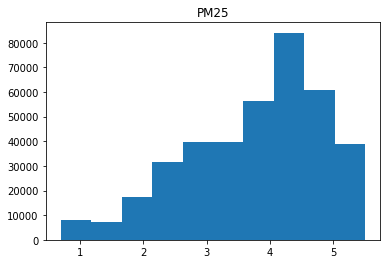

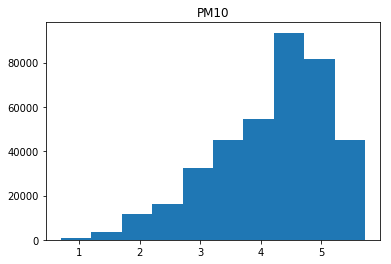

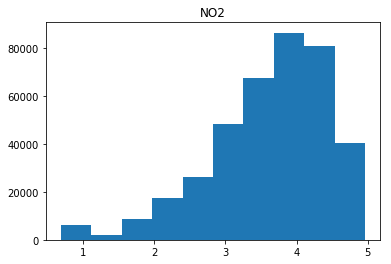

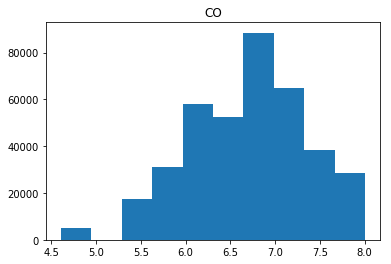

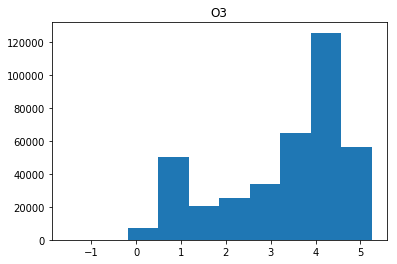

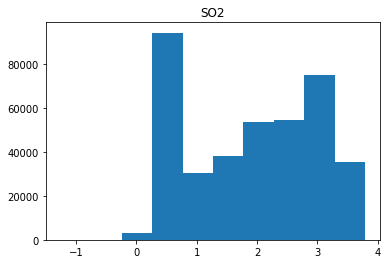

In [35]:

plt.hist(final_data["PM25"])
plt.title("PM25")
plt.show()
plt.hist(final_data["PM10"])
plt.title("PM10")
plt.show()
plt.hist(final_data["NO2"])
plt.title("NO2")
plt.show()
plt.hist(final_data["CO"])
plt.title("CO")
plt.show()
plt.hist(final_data["O3"])
plt.title("O3")
plt.show()
plt.hist(final_data["SO2"])
plt.title("SO2")
plt.show()

In [36]:
data = spark.read.csv('./final_data.csv',header=True, inferSchema =True)

In [37]:
data.printSchema()

root
 |-- PM25: double (nullable = true)
 |-- SO2: double (nullable = true)
 |-- NO2: double (nullable = true)
 |-- CO: double (nullable = true)
 |-- O3: double (nullable = true)
 |-- PM10: double (nullable = true)
 |-- station: string (nullable = true)
 |-- Time: string (nullable = true)
 |-- PM25_group: string (nullable = true)
 |-- SO2_group: string (nullable = true)
 |-- NO2_group: string (nullable = true)
 |-- CO_group: string (nullable = true)
 |-- O3_group: string (nullable = true)



In [38]:
data.head()

Row(PM25=5.38907173, SO2=3.135494216, NO2=4.744932128, CO=7.649692624, O3=0.0, PM10=5.484796933, station='Aotizhongxin', Time='1/10/13 00:00', PM25_group='Unhealthy', SO2_group='Good', NO2_group='Unhealthy', CO_group='Good', O3_group='Good')

In [39]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [40]:
data.columns

['PM25',
 'SO2',
 'NO2',
 'CO',
 'O3',
 'PM10',
 'station',
 'Time',
 'PM25_group',
 'SO2_group',
 'NO2_group',
 'CO_group',
 'O3_group']

In [41]:
assembler = VectorAssembler(
  inputCols=['SO2',
             'NO2',
             'CO',
             'O3',
             'PM10'],
              outputCol="features")

In [10]:
output = assembler.transform(data)

In [11]:
from pyspark.ml.feature import StringIndexer

In [12]:
indexer = StringIndexer(inputCol="PM25_group", outputCol="PrivateIndex")
output_fixed = indexer.fit(output).transform(output)

In [13]:
final_data = output_fixed.select("features",'PrivateIndex')

In [14]:
train_data,test_data = final_data.randomSplit([0.7,0.3])

In [15]:
from pyspark.ml.classification import DecisionTreeClassifier,GBTClassifier,RandomForestClassifier
from pyspark.ml import Pipeline

In [17]:
dtc = DecisionTreeClassifier(labelCol='PrivateIndex',featuresCol='features')
rfc = RandomForestClassifier(labelCol='PrivateIndex',featuresCol='features')
gbt = GBTClassifier(labelCol='PrivateIndex',featuresCol='features')

In [18]:
import time
start_time = time.time()
dtc_model = dtc.fit(train_data)
print("dtc--- %s seconds ---" % (time.time() - start_time))
start_time = time.time()
rfc_model = rfc.fit(train_data)
print("dtc--- %s seconds ---" % (time.time() - start_time))
start_time = time.time()
gbt_model = gbt.fit(train_data)
print("dtc--- %s seconds ---" % (time.time() - start_time))

dtc--- 17.65151047706604 seconds ---
dtc--- 21.061161279678345 seconds ---
dtc--- 31.418638467788696 seconds ---


In [19]:
dtc_predictions = dtc_model.transform(test_data)
rfc_predictions = rfc_model.transform(test_data)
gbt_predictions = gbt_model.transform(test_data)

In [20]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Note that the label column isn't named label, it's named PrivateIndex in this case.
my_binary_eval = BinaryClassificationEvaluator(labelCol = 'PrivateIndex')

In [21]:
print("DTC")
print(my_binary_eval.evaluate(dtc_predictions))

# RFC improves accuracy but also model complexity. RFC outperforms DTC in nearly every situation.
print("RFC")
print(my_binary_eval.evaluate(rfc_predictions))

# We can't repeat these exact steps for GBT. If you print the schema of all three, you may be able to notice why.
# Instead, let's redefine the object:
my_binary_gbt_eval = BinaryClassificationEvaluator(labelCol='PrivateIndex', rawPredictionCol='prediction')
print("GBT")
print(my_binary_gbt_eval.evaluate(gbt_predictions))

DTC
0.9497002049535608
RFC
0.9707176085130603
GBT
0.9124194829123824


In [22]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [23]:
acc_evaluator = MulticlassClassificationEvaluator(labelCol="PrivateIndex", predictionCol="prediction", metricName="accuracy")

In [24]:
import time
start_time = time.time()
dtc_acc = acc_evaluator.evaluate(dtc_predictions)
print("dtc--- %s seconds ---" % (time.time() - start_time))
start_time = time.time()
rfc_acc = acc_evaluator.evaluate(rfc_predictions)
print("rfc--- %s seconds ---" % (time.time() - start_time))
start_time = time.time()
gbt_acc = acc_evaluator.evaluate(gbt_predictions)
print("gbt--- %s seconds ---" % (time.time() - start_time))

dtc--- 5.830805778503418 seconds ---
rfc--- 5.035691976547241 seconds ---
gbt--- 4.98955512046814 seconds ---


In [25]:
print("Here are the results!")
print('-'*40)
print('A single decision tree has an accuracy of: {0:2.2f}%'.format(dtc_acc*100))
print('-'*40)
print('A random forest ensemble has an accuracy of: {0:2.2f}%'.format(rfc_acc*100))
print('-'*40)
print('An ensemble using GBT has an accuracy of: {0:2.2f}%'.format(gbt_acc*100))

Here are the results!
----------------------------------------
A single decision tree has an accuracy of: 91.41%
----------------------------------------
A random forest ensemble has an accuracy of: 91.28%
----------------------------------------
An ensemble using GBT has an accuracy of: 91.42%


In [27]:
dtc = DecisionTreeClassifier(labelCol='PrivateIndex',featuresCol='features',maxDepth=10,impurity = 'Entropy')
start_time = time.time()
dtc_model = dtc.fit(train_data)
print("dtc--- %s seconds ---" % (time.time() - start_time))
dtc_predictions = dtc_model.transform(test_data)
print("DTC")
print(my_binary_eval.evaluate(dtc_predictions))
start_time = time.time()
dtc_acc = acc_evaluator.evaluate(dtc_predictions)
print("dtc--- %s seconds ---" % (time.time() - start_time))
print("Here are the results! with maxDpeth=10, impurity='Entropy'")
print('-'*40)
print('A single decision tree has an accuracy of: {0:2.2f}%'.format(dtc_acc*100))

dtc--- 10.35590386390686 seconds ---
DTC
0.9497002049535608
dtc--- 4.49140477180481 seconds ---
Here are the results! with maxDpeth=10, impurity='Entropy'
----------------------------------------
A single decision tree has an accuracy of: 91.41%


In [30]:
dtc = DecisionTreeClassifier(labelCol='PrivateIndex',featuresCol='features',maxDepth=20,impurity = 'Entropy')
start_time = time.time()
dtc_model = dtc.fit(train_data)
print("dtc--- %s seconds ---" % (time.time() - start_time))
dtc_predictions = dtc_model.transform(test_data)
print("DTC")
print(my_binary_eval.evaluate(dtc_predictions))
start_time = time.time()
dtc_acc = acc_evaluator.evaluate(dtc_predictions)
print("dtc--- %s seconds ---" % (time.time() - start_time))
print("Here are the results! with maxDpeth=20, impurity='Entropy'")
print('-'*40)
print('A single decision tree has an accuracy of: {0:2.2f}%'.format(dtc_acc*100))

dtc--- 16.907479524612427 seconds ---
DTC
0.9212056046293526
dtc--- 5.057047128677368 seconds ---
Here are the results! with maxDpeth=20, impurity='Entropy'
----------------------------------------
A single decision tree has an accuracy of: 89.20%


In [34]:
dtc = DecisionTreeClassifier(labelCol='PrivateIndex',featuresCol='features',maxDepth=10,impurity = 'Gini')
start_time = time.time()
dtc_model = dtc.fit(train_data)
print("dtc--- %s seconds ---" % (time.time() - start_time))
dtc_predictions = dtc_model.transform(test_data)
print("DTC")
print(my_binary_eval.evaluate(dtc_predictions))
start_time = time.time()
dtc_acc = acc_evaluator.evaluate(dtc_predictions)
print("dtc--- %s seconds ---" % (time.time() - start_time))
print("Here are the results! with maxDpeth=10, impurity='Gini'")
print('-'*40)
print('A single decision tree has an accuracy of: {0:2.2f}%'.format(dtc_acc*100))

dtc--- 10.22236156463623 seconds ---
DTC
0.9349229028638565
dtc--- 4.496749401092529 seconds ---
Here are the results! with maxDpeth=10, impurity='Gini'
----------------------------------------
A single decision tree has an accuracy of: 91.40%


In [36]:
dtc = DecisionTreeClassifier(labelCol='PrivateIndex',featuresCol='features',maxDepth=20,impurity = 'Gini')
start_time = time.time()
dtc_model = dtc.fit(train_data)
print("dtc--- %s seconds ---" % (time.time() - start_time))
dtc_predictions = dtc_model.transform(test_data)
print("DTC")
print(my_binary_eval.evaluate(dtc_predictions))
start_time = time.time()
dtc_acc = acc_evaluator.evaluate(dtc_predictions)
print("dtc--- %s seconds ---" % (time.time() - start_time))
print("Here are the results! with maxDpeth=20, impurity='Gini'")
print('-'*40)
print('A single decision tree has an accuracy of: {0:2.2f}%'.format(dtc_acc*100))

dtc--- 16.96869730949402 seconds ---
DTC
0.9187082798485089
dtc--- 5.041982412338257 seconds ---
Here are the results! with maxDpeth=20, impurity='Gini'
----------------------------------------
A single decision tree has an accuracy of: 88.90%


In [66]:

#important: need to cast to float type, and order by prediction, else it won't work
preds_and_labels = dtc_predictions.select(['Prediction','PrivateIndex']).withColumn('label', F.col('PrivateIndex').cast(FloatType())).orderBy('prediction')

#select only prediction and label columns
preds_and_labels = preds_and_labels.select(['prediction','PrivateIndex'])

metrics = MulticlassMetrics(preds_and_labels.rdd.map(tuple))

print(metrics.confusionMatrix().toArray())

[[64006.  6366.]
 [ 6445. 38649.]]


In [74]:
data.groupBy('PM25_group').count().show()

+----------+------+
|PM25_group| count|
+----------+------+
| Unhealthy|149539|
|      Good|234387|
+----------+------+



DataFrame[PM25: double, SO2: double, NO2: double, CO: double, O3: double, PM10: double, station: string, Time: string, PM25_group: string, SO2_group: string, NO2_group: string, CO_group: string, O3_group: string]